# Brianによる神経シミュレーション

順番に Shift + Enter を押していくだけで、シミュレーションが可能です。

参考資料

1.公式チュートリアル　https://brian2.readthedocs.io/en/stable/resources/tutorials/index.html

2.Brianで神経活動シミュレーション https://qiita.com/takeajioka/items/11690b9adee612e48b33

## Brianのインストール


In [ ]:
!pip install brian2

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 5.8MB 12.5MB/s 
  Created wheel for brian2: filename=Brian2-2.3.0.2-cp36-cp36m-linux_x86_64.whl size=1283469 sha256=2fad7cb1d4cb9ccd538bab068a18976f58c17adec7a14fd9fc7050f2fbd1bd61
  Stored in directory: /root/.cache/pip/wheels/86/b5/f6/0c8f9eec58c01e4af55a4c79a5e0385aea01ed03e4ec36c4ac
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


これで、GoogleColab上でBrianが使えるようになりました。(制限時間12時間)

次からは、デモを行います。

## デモ　神経細胞集団のラスタープロット

In [ ]:
import brian2
brian2.start_scope()

/usr/local/lib/python3.6/dist-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [ ]:
# 神経細胞集団の設定
# 100個の細胞にランダムに電位を入力している
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [ ]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [ ]:
# シミュレーション実行
brian2.run(200*brian2.ms)

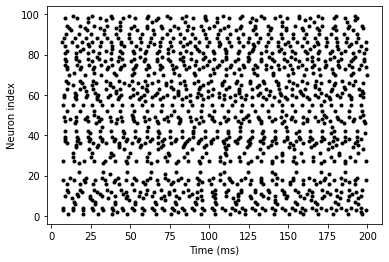

In [ ]:
# プロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index');

## デモ　STDPによる可塑性のシミュレーション

In [ ]:
import brian2
brian2.start_scope()

In [ ]:
# 神経細胞集団の設定
# 100個の細胞にランダムに電位を入力している
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [ ]:
# シナプス結合を定義（STDP）
taupre = taupost = 20*brian2.ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
S = brian2.Synapses(G, G,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(condition='i!=j')

Text(0, 0.5, 'W')

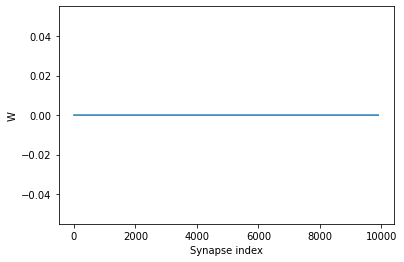

In [ ]:
# 最初のシナプス結合
brian2.plot(S.w)
brian2.xlabel('Synapse index')
brian2.ylabel('W');

In [ ]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [ ]:
# シミュレーション実行
brian2.run(1*brian2.second)

Text(0, 0.5, 'W')

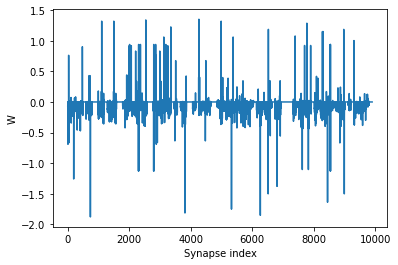

In [ ]:
# 現在のシナプス結合
brian2.plot(S.w)
brian2.xlabel('Synapse index')
brian2.ylabel('W');

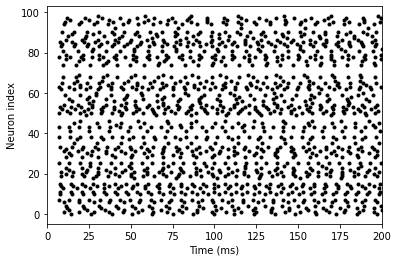

In [ ]:
# 初期のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([0, 200]);

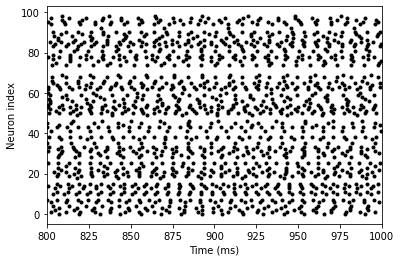

In [ ]:
# 最後のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([1000 - 200, 1000]);

シナプス結合が形成されるようになり、活動も少し変化したように思われる。